In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/earthquakes-alerts-tweets-dataset-daily-updated/QuakesToday.csv


In [2]:
import numpy as np                                                        # basic library to work with arrays
import pandas as pd                                                       # to read files
import seaborn as sns                                                     # library for statistical data visualization
import matplotlib.pyplot as plt                                           # basic library for plotting graphs and visualization
from matplotlib.colors import ListedColormap                              # for filling colors in mapping
from sklearn.metrics import confusion_matrix, accuracy_score              # importing confusion matrix, accuracy score
from sklearn.svm import SVC, SVR, LinearSVC                               # importing Support vector classifier, Support Vector Regressor, LinearSVC  
from sklearn.preprocessing import StandardScaler, LabelEncoder            # preprocessing
from sklearn.model_selection import train_test_split                      # for splitting the dataset
from mlxtend.plotting import plot_decision_regions                        # to plot the decision boundaries and hyperplane
from sklearn.pipeline import make_pipeline                                # to import pipeline
from sklearn.linear_model import SGDClassifier                            # to import SGD Classifier

import spacy

In [3]:
dataset= pd.read_csv('/kaggle/input/earthquakes-alerts-tweets-dataset-daily-updated/QuakesToday.csv')
dataset.head()

,Datetime,Tweet Id,Text,Username
0,2023-06-29 20:27:03+00:00,1674514840549994498,2.0 magnitude #earthquake. 7 km from Enterpris...,QuakesToday
1,2023-06-29 20:04:03+00:00,1674509052423081985,"2.0 magnitude #earthquake. 3 km ESE of Egegik,...",QuakesToday
2,2023-06-29 20:01:04+00:00,1674508302087254017,2.2 magnitude #earthquake. 39 km from #Mentone...,QuakesToday
3,2023-06-29 20:01:04+00:00,1674508300061384704,"1.9 magnitude #earthquake. 20 km from Healy, #...",QuakesToday
4,2023-06-29 19:56:04+00:00,1674507042315472899,"2.4 magnitude #earthquake. 39 km from Mentone,...",QuakesToday


In [4]:
dataset.shape

(15496, 4)

In [5]:
dataset.Text[2]

'2.2 magnitude #earthquake. 39 km from #Mentone, TX, United States https://t.co/HNhLt5S2MB'

In [6]:
#create a new dataframe from the Texts. and associate DateTime column with the magnitude, earthquake, distance from a source, source name, state, country
import re

# Load the English language model for spaCy
#nlp = spacy.load('en_core_web_sm')

# Function to extract magnitude, distance, state, and country from text
def extract_info(text):
    
    # Finding parameters mentioned in the text
    #magnitude = None
    #distance = None
    #state = None
    #country = None
    
    # Define regular expressions for extracting magnitude, distance, source, state, and country
    #magnitude_pattern = r'(\d+\.\d+)\s+magnitude'
    #distance_pattern = r'(\d+)\s+km\s+from'
    #source_pattern = r'km\s+from\s+(\w+),\s+(\w+),'
    #state_country_pattern = r',\s+(\w+),\s+#(\w+)'

    # Extracting magnitude, distance, source, state, and country using regular expressions
    #magnitude_match = re.search(magnitude_pattern, text)
    #distance_match = re.search(distance_pattern, text)
    #source_match = re.search(source_pattern, text)
    #state_country_match = re.search(state_country_pattern, text)
    
    # Extracting values from matches
    #magnitude = float(magnitude_match.group(1)) if magnitude_match else None
    #distance = int(distance_match.group(1)) if distance_match else None
    #source = source_match.group(1) if source_match else None
    #state = state_country_match.group(1) if state_country_match else None
    #country = state_country_match.group(2) if state_country_match else None
    
    #-------------------------------------------------------------------------
    words = text.split()
    #print(len(words))
    magnitude = None
    distance = None
    source = None
    state = None
    country = None

    #'2.0 magnitude #earthquake. 7 km from Enterprise, NV, #UnitedStates https://t.co/P302bmZuGM'
    #'2.0 magnitude #earthquake. 3 km ESE of Egegik, Alaska https://t.co/sPv4wM2UZY'
    #'2.2 magnitude #earthquake. 39 km from #Mentone, TX, United States https://t.co/HNhLt5S2MB'
    
    try:
        magnitude = float(words[0])
        distance = float(words[3])
        source = words[5].lstrip('#').rstrip(',') if words[5] != 'from' else words[6].lstrip('#').rstrip(',')
        state = words[7].lstrip('#').rstrip(',')
        country = words[8].lstrip('#')
    except:
        return None, None, None, None, None
        
    # Print the extracted values
    #print(f'Magnitude: {magnitude}')
    #print(f'Distance: {distance}')
    #print(f'Source: {source}')
    #print(f'State: {state}')
    #print(f'Country: {country}')
        
        
    return magnitude, distance, source, state, country


#extract_info(dataset['Text'][2])

# Create dataframe
# Apply extraction function to each row in the dataframe
dataset['Magnitude'], dataset['Distance_from_source_km'], dataset['Source'], dataset['State'], dataset['Country'] = \
    zip(*dataset['Text'].apply(extract_info))

# Create new dataframe with extracted information
df_texts = dataset[['Datetime', 'Magnitude', 'Distance_from_source_km', 'Source', 'State', 'Country']]

print(df_texts)
print(df_texts.shape)

                        Datetime  Magnitude  Distance_from_source_km  \
0      2023-06-29 20:27:03+00:00        2.0                      7.0   
1      2023-06-29 20:04:03+00:00        2.0                      3.0   
2      2023-06-29 20:01:04+00:00        2.2                     39.0   
3      2023-06-29 20:01:04+00:00        1.9                     20.0   
4      2023-06-29 19:56:04+00:00        2.4                     39.0   
...                          ...        ...                      ...   
15491  2023-02-16 22:08:02+00:00        1.7                     52.0   
15492  2023-02-16 22:06:03+00:00        3.0                     41.0   
15493  2023-02-16 21:53:03+00:00        NaN                      NaN   
15494  2023-02-16 21:39:03+00:00        2.1                      3.0   
15495  2023-02-16 21:17:03+00:00        1.9                      4.0   

             Source   State       Country  
0        Enterprise      NV  UnitedStates  
1               ESE  Egegik        Alaska  
2  

In [7]:
df_texts = df_texts.dropna()
print(df_texts.shape)

(14423, 6)


In [8]:
df_texts.head(100)

,Datetime,Magnitude,Distance_from_source_km,Source,State,Country
0,2023-06-29 20:27:03+00:00,2.0,7.0,Enterprise,NV,UnitedStates
1,2023-06-29 20:04:03+00:00,2.0,3.0,ESE,Egegik,Alaska
2,2023-06-29 20:01:04+00:00,2.2,39.0,Mentone,TX,United
3,2023-06-29 20:01:04+00:00,1.9,20.0,Healy,AK,United
4,2023-06-29 19:56:04+00:00,2.4,39.0,Mentone,TX,United
...,...,...,...,...,...,...
101,2023-06-29 02:42:03+00:00,1.6,36.0,ENE,Pedro,"Bay,"
102,2023-06-29 02:16:03+00:00,1.8,4.0,Westmorland,CA,UnitedStates
103,2023-06-29 02:09:03+00:00,1.8,7.0,Cobb,CA,UnitedStates
104,2023-06-29 02:06:04+00:00,2.0,5.0,Ferndale,CA,UnitedStates


In [9]:
# Initialize LabelEncoder
encoder = LabelEncoder()
# Encode categorical columns
df_texts['Source_encoded'] = encoder.fit_transform(df_texts['Source'])
df_texts['State_encoded'] = encoder.fit_transform(df_texts['State'])
df_texts['Country_encoded'] = encoder.fit_transform(df_texts['Country'])
df_texts.head()

,Datetime,Magnitude,Distance_from_source_km,Source,State,Country,Source_encoded,State_encoded,Country_encoded
0,2023-06-29 20:27:03+00:00,2.0,7.0,Enterprise,NV,UnitedStates,408,497,335
1,2023-06-29 20:04:03+00:00,2.0,3.0,ESE,Egegik,Alaska,377,231,13
2,2023-06-29 20:01:04+00:00,2.2,39.0,Mentone,TX,United,893,705,334
3,2023-06-29 20:01:04+00:00,1.9,20.0,Healy,AK,United,536,1,334
4,2023-06-29 19:56:04+00:00,2.4,39.0,Mentone,TX,United,893,705,334


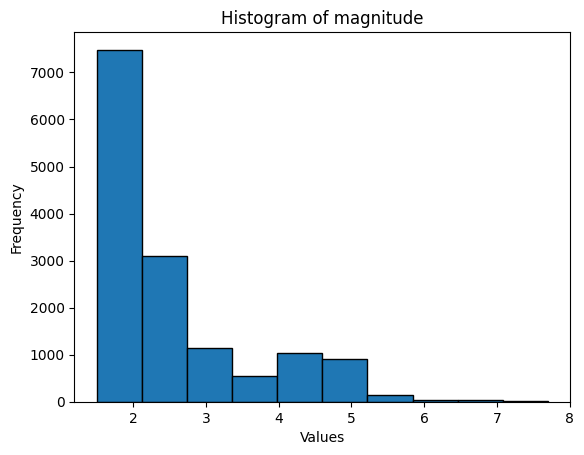

In [10]:
#understand distribution of magnitude in a magnitude column of a dataframe. This will help to make the column discrete values 
#which is currently type of continuous value. This will help to use SVD as svd accepts only discrete values in target variables.

import matplotlib.pyplot as plt

# Plot histogram for magnitude
plt.hist(df_texts['Magnitude'], bins=10, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of magnitude')
plt.show()


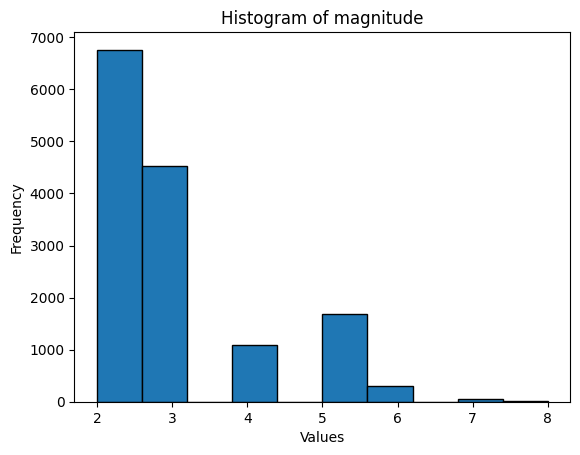

In [11]:
#From the above values, we need to use floor and check again
df_magnitude = df_texts['Magnitude']
df_magnitude = df_magnitude.apply(np.ceil)

# Plot histogram for magnitude
plt.hist(df_magnitude, bins=10, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of magnitude')
plt.show()

In [12]:
#Assuming the magnitude values currently to it ceiling from the above result
df_magnitude.head()

0    2.0
1    2.0
2    3.0
3    2.0
4    3.0
Name: Magnitude, dtype: float64

In [13]:
df_texts['Magnitude'] = df_magnitude

In [14]:
# defining the independent and dependent variable
x = df_texts.iloc[:, [2, 6, 7, 8]].values                  
y = df_texts.iloc[:, 1].values 

print(x)
print(y[:5])

[[7.000e+00 4.080e+02 4.970e+02 3.350e+02]
 [3.000e+00 3.770e+02 2.310e+02 1.300e+01]
 [3.900e+01 8.930e+02 7.050e+02 3.340e+02]
 ...
 [4.100e+01 1.516e+03 1.000e+00 3.340e+02]
 [3.000e+00 5.630e+02 1.210e+02 3.340e+02]
 [4.000e+00 8.540e+02 1.210e+02 3.340e+02]]
[2. 2. 3. 2. 3.]


In [15]:
# using train test split, splitting the dataset into training and testing data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=0)  

In [16]:
# Scaling the data
st_x = StandardScaler()
#st_y = StandardScaler()
x_train = st_x.fit_transform(x_train)    
x_test = st_x.transform(x_test)  

In [17]:
# kernel = 'linear' is used on data which is separable
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [18]:
# Make a pipeline of Scaling and SVM
clf = make_pipeline(StandardScaler(),
                     LinearSVC(random_state=0, tol=1e-5, max_iter=10000))
clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(max_iter=10000, random_state=0, tol=1e-05))])

In [19]:
# predicting using SVC with kernel='Linear'
y_pred = classifier.predict(x_test)   
print("predicted values ",y_pred)   

predicted values  [2. 2. 2. ... 2. 2. 2.]


In [20]:
# Compute evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.5058236272878536
Precision: 0.29834574580096745
Recall: 0.5058236272878536
F1 Score: 0.3604307437748481
Confusion Matrix:
[[1692    0    0    4    0    0    0]
 [1134    0    0   23    0    0    0]
 [ 219    0    0   41    0    0    0]
 [ 274    0    0  132    0    0    0]
 [  38    0    0   31    0    0    0]
 [   7    0    0    5    0    0    0]
 [   2    0    0    4    0    0    0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Using SGD Classifier

# Always scale the input. The most convenient way is to use a pipeline.
clf2 = make_pipeline(StandardScaler(),
                     SGDClassifier(max_iter=10000, tol=1e-3, loss="hinge"))
clf2.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(max_iter=10000))])

In [22]:
# predicting results using SGD Classifier
y_pred2 = clf2.predict(x_test)   

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.5058236272878536
Precision: 0.7154283858453381
Recall: 0.5058236272878536
F1 Score: 0.3604307437748481
Confusion Matrix:
[[1692    0    0    4    0    0    0]
 [1134    0    0   23    0    0    0]
 [ 219    0    0   41    0    0    0]
 [ 274    0    0  132    0    0    0]
 [  38    0    0   31    0    0    0]
 [   7    0    0    5    0    0    0]
 [   2    0    0    4    0    0    0]]


****Another Approach****
****We need to see if any of the predictors has a relationship with the others****

                         Distance_from_source_km  Source_encoded  \
Distance_from_source_km                 1.000000        0.099920   
Source_encoded                          0.099920        1.000000   
State_encoded                           0.096677       -0.014849   
Country_encoded                        -0.320722        0.002824   

                         State_encoded  Country_encoded  
Distance_from_source_km       0.096677        -0.320722  
Source_encoded               -0.014849         0.002824  
State_encoded                 1.000000        -0.247163  
Country_encoded              -0.247163         1.000000  


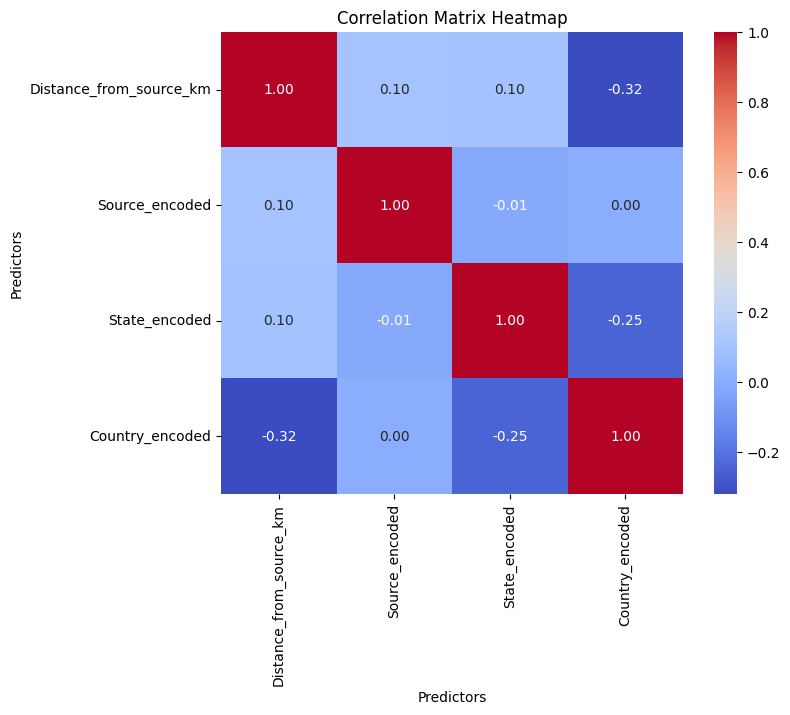

In [23]:
# Specify the column names of your predictors
predictors = ['Distance_from_source_km', 'Source_encoded', 'State_encoded', 'Country_encoded']

# Calculate the correlation matrix
correlation_matrix = df_texts[predictors].corr()

# Print or visualize the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Predictors')
plt.ylabel('Predictors')
plt.show()

**From the coorelation matrix above it can be said that the predictors are not biased**